# Titanic Notebook

This is notebook for Titanic Machine Learning competition from Kaggle. The goal is to predict correctly, according to data about each person, did that person survive or not.

## TOC:
* [Importing libraries and reading data](#first-bullet)
* [Data Understanding, Visualization, Preparation](#second-bullet)
* [Modeling](#third-bullet)

## Importing libraries and reading data<a class="anchor" id="first-bullet"></a>


First, it is necessary to import all needed libraries and read data from Kaggle website.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb

In [2]:
train = pd.read_csv('C:/Users/Ana Parcina/Documents/Kaggle/Titanic/train.csv')
test = pd.read_csv('C:/Users/Ana Parcina/Documents/Kaggle/Titanic/test.csv')
example = pd.read_csv('C:/Users/Ana Parcina/Documents/Kaggle/Titanic/gender_submission.csv')

In [3]:
train.head() #train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head() # test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that test data does not have 'Survived' coloumn.

In [5]:
example.head() # this is how submission should look like

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Understanding, Visualization, Preparation<a class="anchor" id="second-bullet"></a>

In [6]:
train.describe() # using this function to see all information about data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.isnull().sum() #to find out is there missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is a lot of missing data in columns 'Cabin' and 'Age'.

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

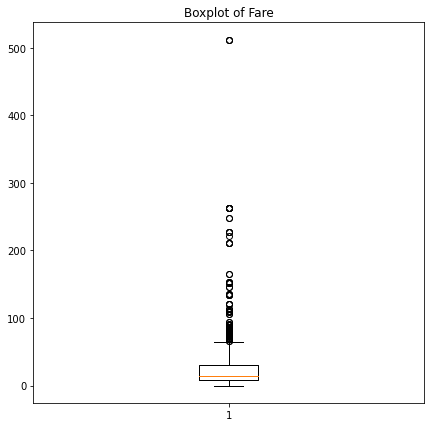

In [10]:
plt.subplots(figsize=(7, 7))
plt.boxplot(train['Fare'])
plt.title('Boxplot of Fare')
plt.show()

I will take a look at outliers of fare data.

In [11]:
train[train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Since all of three passengers from above have same ticket number we can asume that their fare price is calculated for group, so we need to divide fare on three of them. The same thing happened with passengers that have fare above 60. According to that I will make function that counts how many people have the same ticket and divides fare according to number of people.

In [12]:
group_fare = train[train['Fare'] > 60].groupby(by = 'Ticket').size().to_frame(name='counts')
group_fare # this would be frame used for fare correction

,counts
Ticket,
110152,3
110413,3
110813,1
113503,1
113509,1
113572,2
113760,4
113776,2
113781,4


In [13]:
group_fare.shape

(54, 1)

In [14]:
group_fare['Ticket'] = group_fare.index
group_fare.head()

,counts,Ticket
Ticket,,
110152,3,110152
110413,3,110413
110813,1,110813
113503,1,113503
113509,1,113509


In [15]:
group_fare.reset_index(drop = True)
group_fare.head()

,counts,Ticket
Ticket,,
110152,3,110152
110413,3,110413
110813,1,110813
113503,1,113503
113509,1,113509


fare_correction is function that will be used to recognize group tickets and correcting fare values.

In [16]:
def fare_correction (df):
    rows = df.shape[0]
    for i in range(0, rows):
        if df.iloc[i]['counts'] > 1:
            idx = train.index[train['Ticket'] == df.iloc[i]['Ticket']][0]
            new_fare = train.iloc[idx]['Fare'] / df.iloc[i]['counts']
            train.loc[train['Ticket'] == df.iloc[i]['Ticket'], 'Fare'] = new_fare
    

In [17]:
fare_correction(group_fare)

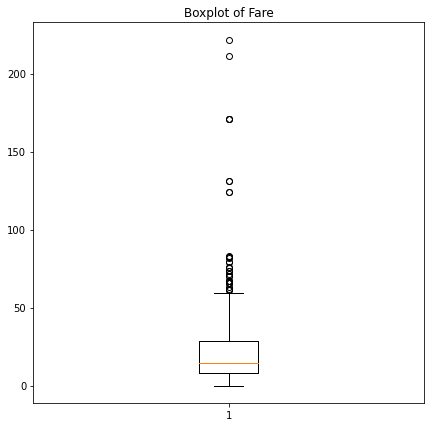

In [18]:
plt.subplots(figsize=(7, 7))
plt.boxplot(train['Fare'])
plt.title('Boxplot of Fare')
plt.show()

After using fare_correction funciton, we can see that there are less outliers. Now let's see what happened with people whose fare is equal  to 0.

In [19]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


I assume that this people got free tickets, I will note change values of fare for this passengers.

In [20]:
test.iloc[152] #passneger with NaN fare in test data

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

Now, let's see what how does fare data look like in test data.

In [21]:
test.loc[152, 'Fare'] = 35.627188 # passenger has no fare data, I will fill missing data with mean, passengerId = 152

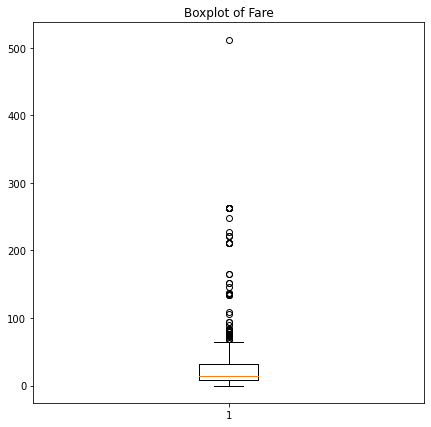

In [22]:
plt.subplots(figsize=(7, 7))
plt.boxplot(test['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [23]:
fare_outliers_test = test[test['Fare'] > 60] # this data shows that here are also some people that have fare that is referenig to grorp of people
fare_outliers_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C


In [24]:
group_fare_test = fare_outliers_test.groupby(by = 'Ticket').size().to_frame(name='counts')
group_fare_test # this would be frame used for fare correction

,counts
Ticket,
110813,1
113503,4
113509,1
113781,2
11767,1
11813,1
12749,2
13050,2
13508,2


In [25]:
group_fare_test['Ticket'] = group_fare_test.index
group_fare_test.head()

,counts,Ticket
Ticket,,
110813,1,110813
113503,4,113503
113509,1,113509
113781,2,113781
11767,1,11767


I will use almost identical function for fare correction, this time I will correct data in test set.

In [26]:
def fare_correction_test (df):
    rows = df.shape[0]
    for i in range(0, rows):
        if df.iloc[i]['counts'] > 1:
            idx = test.index[test['Ticket'] == df.iloc[i]['Ticket']][0]
            new_fare = test.iloc[idx]['Fare'] / df.iloc[i]['counts']
            test.loc[test['Ticket'] == df.iloc[i]['Ticket'], 'Fare'] = new_fare
    

In [27]:
fare_correction_test(group_fare_test)

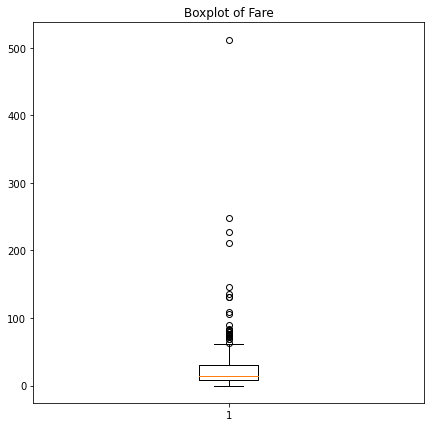

In [28]:
plt.subplots(figsize=(7, 7))
plt.boxplot(test['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [29]:
test[test['Fare'] > 150] #cardeza(luxury cabin --> that explains why fare is so high after fare correction)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [30]:
test[test['Fare'] == 0] #ismay(no information about fare), roderick - member of'guarantee gropu', did not leave the ship

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


After clening fare data, I will look into some diagrams to understand other data.

In [31]:
import seaborn as sns

As I could assume, more male passengers died than female passengers.

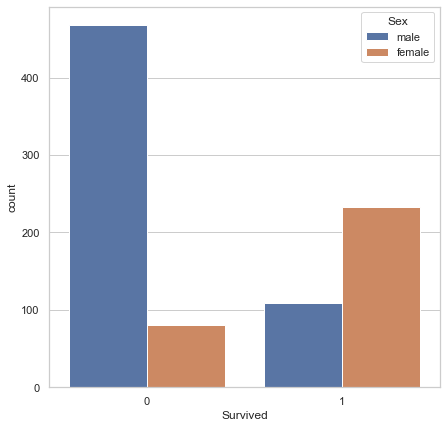

In [32]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize= (7, 7))
sns.countplot(train['Survived'], hue = 'Sex', data = train)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


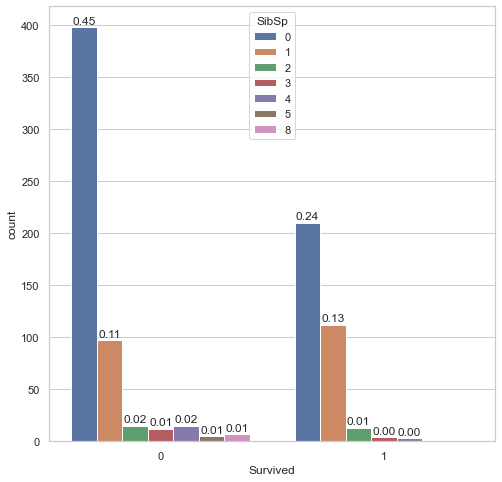

In [33]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize= (8, 8))
sns.countplot(train['Survived'], hue = 'SibSp', data = train)
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


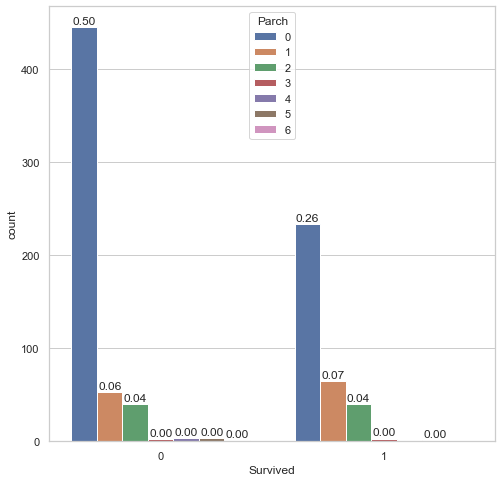

In [34]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize= (8, 8))
sns.countplot(train['Survived'], hue = 'Parch', data = train)
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

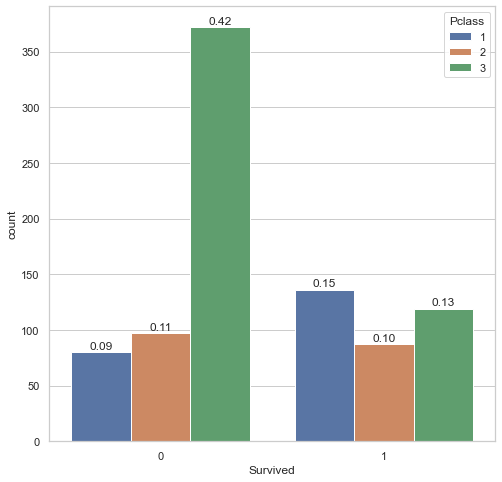

In [35]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize= (8, 8))
sns.countplot(train['Survived'], hue = 'Pclass', data = train)
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

There is big difference between nubmer of people who survived and not for class 3, so I will take in count that class and also class 1. I will do one hot encoding and take this two for future machine learning model. I will later drop unnecessary columns.

In [36]:
train[['1', '2', '3']] = pd.get_dummies(train.Pclass)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [37]:
test[['1', '2', '3']] = pd.get_dummies(test.Pclass)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


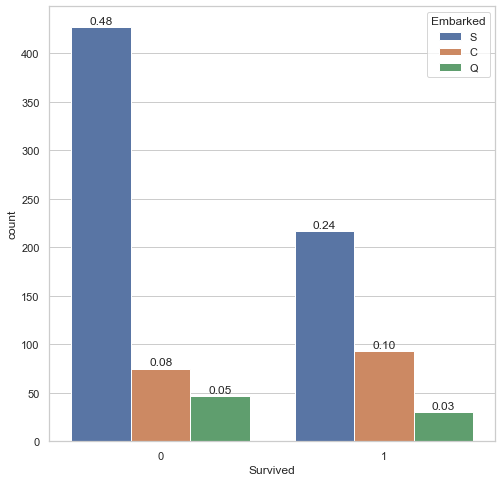

In [38]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize= (8, 8))
sns.countplot(train['Survived'], hue = 'Embarked', data = train)
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

We can see that for C and Q, there is not big difference between passengers that survived and did not, but for S there is so I will do one hot encoding for this data.

In [39]:
train[['C', 'Q', 'S']] = pd.get_dummies(train['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1


In [40]:
test[['C', 'Q', 'S']] = pd.get_dummies(test['Embarked'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1


Now, we need to deal with the biggest problem here, that is missing age data. I will first explore data that I have.

In [41]:
age_non_nan = train[train['Age'].notnull()] #there is a lot of missing data, so I need to take data that I have to make boxplot

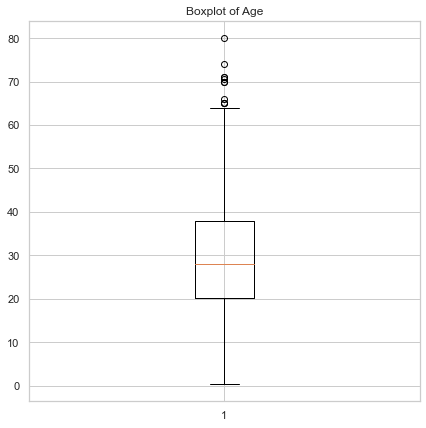

In [42]:
plt.subplots(figsize=(7, 7))
plt.boxplot(age_non_nan['Age'])
plt.title('Boxplot of Age')
plt.show()

In [43]:
#outliers of age data
age_non_nan[age_non_nan['Age'] > 63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,0,1,0,0,0,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,0,0,1,0,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,0,0,1,0,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,0,1,0,1,0
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,0,0,1,0,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,65.7500,C23 C25 C27,S,1,0,0,0,0,1
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,1,0,0,0,0,1
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,0,0,1,0,0
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S,1,0,0,0,0,1
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,0,0,0,0,1


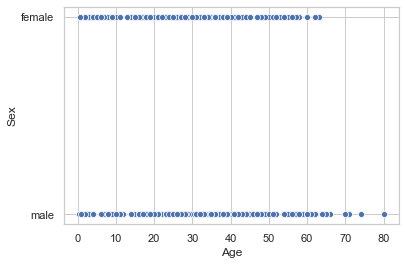

In [44]:
# scatter plot (Age vs Sex)
sns.scatterplot(data = age_non_nan, x = "Age", y = "Sex")

In [45]:
# group train data by 'sex' and calculate the median age
grouped_age = train.groupby('Sex').median()['Age']
grouped_age

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [46]:
# fill the missing age value in train data
train.set_index('Sex', drop = False, inplace = True)
train['Age'].fillna(grouped_age, inplace = True)
train.reset_index(drop = True, inplace = True)

In [47]:
# group test data by 'sex' and calculate the median age
grouped_age_test = test.groupby('Sex').median()['Age']
grouped_age_test

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [48]:
# fill the missing age value in test data
test.set_index('Sex', drop = False, inplace = True)
test['Age'].fillna(grouped_age_test, inplace = True)
test.reset_index(drop = True, inplace = True)

Now, I will see is there any missing data in columns that are important for future model.

In [49]:
# missing values in train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
1                0
2                0
3                0
C                0
Q                0
S                0
dtype: int64

In [50]:
# missing data in test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
1                0
2                0
3                0
C                0
Q                0
S                0
dtype: int64

In [51]:
# replacing male with 0 and female with 1 in sex column (train data)
train = train.replace({'Sex': {'male': 0, 'female': 1}})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1


In [52]:
# replacing male with 0 and female with 1 in sex column (test data)
test = test.replace({'Sex': {'male': 0, 'female': 1}})
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1


In [53]:
# Drop unnecessary rows and columns
train.drop(columns=['Pclass', 'Name', 'Cabin', 'Ticket', 'Embarked', '2', 'C', 'Q'], inplace=True)
test.drop(columns=['Pclass', 'Name', 'Cabin', 'Ticket', 'Embarked', '2', 'C', 'Q'], inplace=True)
train.head()
test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,1,3,S
0,892,0,34.5,0,0,7.8292,0,1,0
1,893,1,47.0,1,0,7.0000,0,1,1
2,894,0,62.0,0,0,9.6875,0,0,0
3,895,0,27.0,0,0,8.6625,0,1,1
4,896,1,22.0,1,1,12.2875,0,1,1


In [54]:
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1,3,S
0,1,0,0,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,1,26.0,0,0,7.9250,0,1,1
3,4,1,1,35.0,1,0,53.1000,1,0,1
4,5,0,0,35.0,0,0,8.0500,0,1,1


In [55]:
# Apply feature scaling using MinMaxScaler
scaler = MinMaxScaler()
train.iloc[:, 2:] = scaler.fit_transform(train.iloc[:, 2:])
test.iloc[:, 1:] = scaler.transform(test.iloc[:, 1:])

In [56]:
X_train, X_test, y_train = train.iloc[:, 2:], test.iloc[:, 1:], train['Survived']

In [57]:
# Function to generate submission file to get test score
def submission(preds):
    test['Survived'] = preds
    predictions = test[['PassengerId', 'Survived']]
    predictions.to_csv('submission.csv', index=False)


## Modeling<a class="anchor" id="third-bullet"></a>

### Logistic Regression

In [58]:
# Classification model
LogReg = LogisticRegression()

In [59]:
seed = 101

# Parameters to tune
params = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
           'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10, random_state = seed)
lr_clf = GridSearchCV(LogReg, params, cv = cv, n_jobs = -1)
lr_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}])

In [60]:
# Best parameters
lr_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [61]:
# Train score
lr_clf.best_score_

0.7961942125415855

In [62]:
# Test score
y_preds = lr_clf.predict(X_test)
submission(y_preds)

### KNN

In [63]:
# Classification model
knn = KNeighborsClassifier()

# Parameters to tune
params = [{'n_neighbors': range(1, 21),
           'p': [1, 2]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
knn_clf = GridSearchCV(knn, params, cv=cv, n_jobs=-1)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 21), 'p': [1, 2]}])

In [64]:
# Best parameters
knn_clf.best_params_

{'n_neighbors': 8, 'p': 1}

In [65]:
# Train score
knn_clf.best_score_

0.8111035088820537

In [66]:
# Test score
y_preds = knn_clf.predict(X_test)
submission(y_preds)

### SVM

In [67]:
# Classification model
svm = SVC(max_iter = 10000)

# Parameters to tune
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10, random_state = seed)
svm_clf = GridSearchCV(svm, params, cv = cv, n_jobs = -1)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=SVC(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [68]:
# Best parameters
svm_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [69]:
# Train score
svm_clf.best_score_

0.8136946833218255

In [70]:
# Test score
y_preds = svm_clf.predict(X_test)
submission(y_preds)

### Decision Tree

In [71]:
# Classification model
dt = DecisionTreeClassifier(random_state=seed)

# Parameters to tune
params = [{'max_depth': [5, 7, 10, None],
           'min_samples_split': [2, 5, 10],
           'max_features': ['sqrt', 5, 7, 10]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10, random_state=seed)
dt_clf = GridSearchCV(dt, params, cv = cv, n_jobs = -1)
dt_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 10, None],
                          'max_features': ['sqrt', 5, 7, 10],
                          'min_samples_split': [2, 5, 10]}])

In [72]:
# Best parameters
dt_clf.best_params_

{'max_depth': 7, 'max_features': 5, 'min_samples_split': 10}

In [73]:
# Train score
dt_clf.best_score_

0.8114525139664805

In [74]:
# Test score
y_preds = dt_clf.predict(X_test)
submission(y_preds)

### Random Forest

In [75]:
# Note: This cell will take a while to run depending on the available processing power

# Classification model
rf = RandomForestClassifier(random_state=seed)

# Parameters to tune
params = [{'n_estimators': range(50, 550, 50),
           'max_depth': [5, 7, 10, None],
           'min_samples_split': [2, 5, 10],
           'max_features': ['sqrt', 5, 7, 10]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=seed)
rf_clf = GridSearchCV(rf, params, cv=cv, n_jobs=-1)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=101),
             estimator=RandomForestClassifier(random_state=101), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 10, None],
                          'max_features': ['sqrt', 5, 7, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(50, 550, 50)}])

In [76]:
# Best parameters
rf_clf.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 450}

In [77]:
# Train score
rf_clf.best_score_

0.834123407193522

In [78]:
# Test score
y_preds = rf_clf.predict(X_test)
submission(y_preds)

### Results

The following table represents result of different machine learning models.

| Model | Best Score | Submission Score |
| --- | --- | --- |
| LogReg | 0.79619 | 0.76555 |
| KNN | 0.8111 | 0.76076 |
| SVM | 0.81369 | 0.7799 |
| Desission Tree | 0.81145 | 0.75119 |
| Random Forest | 0.83412 | 0.75119 |

The best submission score is with SVM model.